# Exercício 2 - Segunda Lista de Processamento de Imagens

Lorran de Araújo Durães Soares e Welber Paraizo Ferreira

**Estude a teoria da PCA para problemas com amostras pequenas**, onde o número de pontos de dados é menor
que a dimensão do espaço de dados (veja [3] ou a seção 12.1.4 de [1]). Escolha um banco de dados de imagens ([6],
por exemplo), converta as imagens para tons de cinza e aplique a teoria de ‘PCA para problemas com amostras pequenas’
para a redução de dimensionalidade.

1. **Seja** x a média amostral (centróide do conjunto de dados) e p1 o componente principal. Visualize o
   resultado da expressão:

   x = x + αp1

   onde α ∈ {−βλ1, 0, βλ1} com λ1 sendo o autovalor associado a p1
   e β um fator escalar (veja [5]).

2. **Estude o espectro da matriz** X^T X para realizar a redução de dimensionalidade. Visualize algumas
   imagens no espaço de dimensão reduzida.

3. **Construa um gerador de imagens** usando os d componentes principais escolhidos no item (2).



In [15]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from funcoes import PCAAnalysis
np.random.seed(42)
random.seed(42)

# Preparação dos Dados

Carregando conjunto de imagens:

In [16]:
image_dir = './fei-database/'
images = []
image_paths = []
labels=[]

for img_name in os.listdir(image_dir):
    if img_name[-5] == 'a':
        label = 0  # Classe 0 para sério
    elif img_name[-5] == 'b':
        label = 1  # Classe 1 para sorrindo
    else:
        continue

    labels.append(label)

    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    img = img.resize((260, 360))  
    img_array = np.array(img)
    images.append(img_array)
    image_paths.append(img_path)  

images = np.array(images)
labels = np.array(labels)
images.shape, labels.shape

((400, 360, 260, 3), (400,))

Plotando algumas imagens da base dados como exemplo:

In [17]:
def plot_images(imgs):
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    for i in range(3):
        if imgs.shape == (400,360,260,3):
            axes[i].imshow(imgs[np.random.randint(0,399)], cmap='gray')
        else:
            image = imgs[np.random.randint(0,399)]
            axes[i].imshow(image.reshape(360, 260), cmap='gray')
        axes[i].set_title(f'Imagem exemplo {i+1}')
        axes[i].axis('off')  
    plt.show()

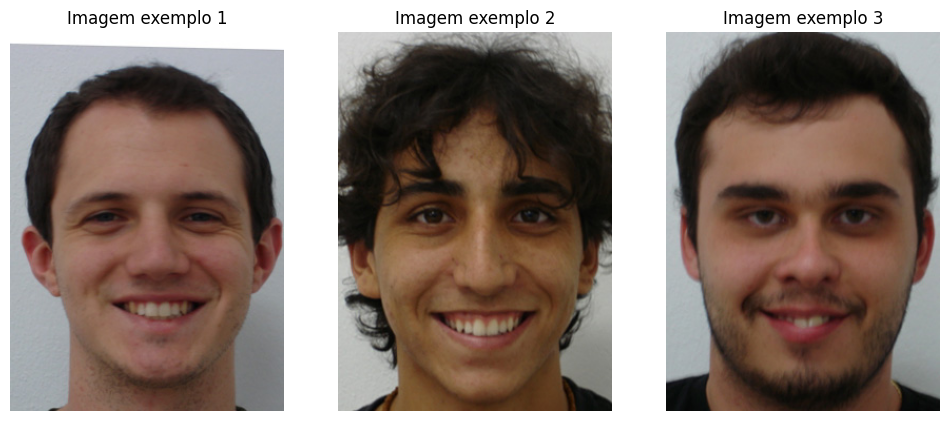

In [18]:
plot_images(images)

Pre-processamento:

In [19]:
def pre_processamento(images):
    # deixa em tom de cinza
    images_preproces = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

    # vetoriza
    images_preproces = images_preproces.reshape(images.shape[0], -1)

    # # normaliza
    # images_preproces = images_preproces / np.linalg.norm(images_preproces, axis=0)

    return images_preproces

In [20]:
images_preproces = pre_processamento(images)
images_preproces.shape

(400, 93600)

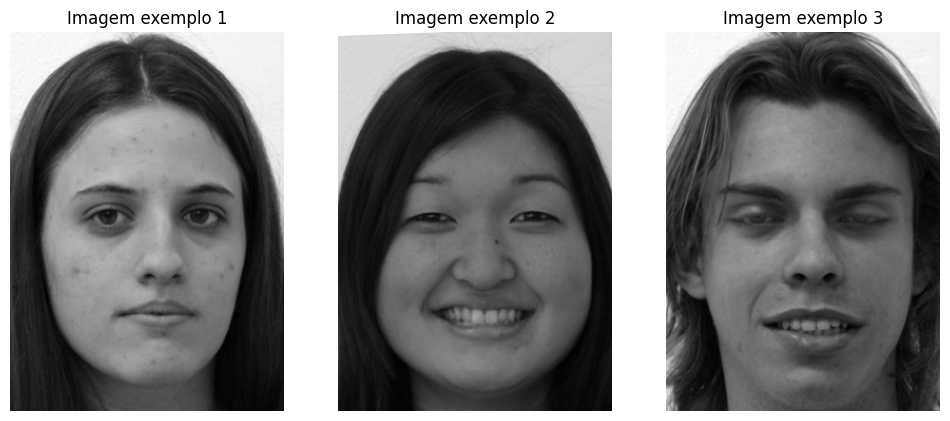

In [21]:
plot_images(images_preproces)

# Realizando PCA para poucas amostras

Treinando o PCA:

In [22]:
pca_small_size = PCAAnalysis(images_preproces, labels)
pca_small_size.fit();

Plotando imagens com apenas a componente principal:

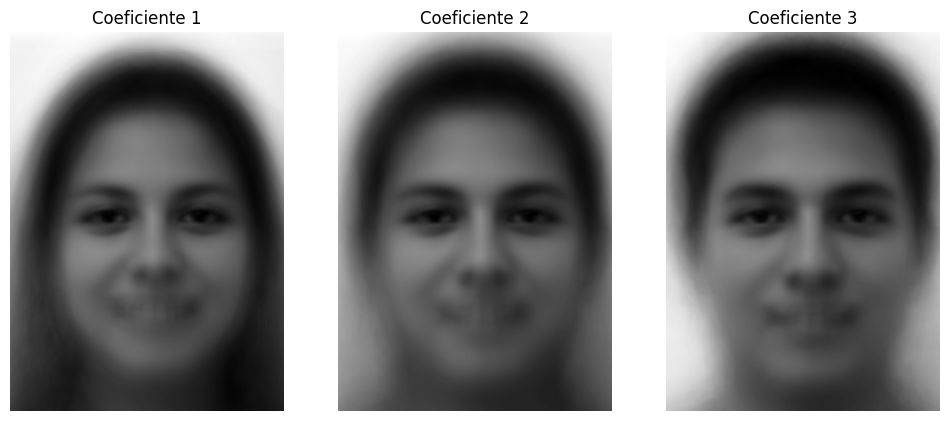

In [23]:
pca_small_size.plot_primeira_component(coeficiente=1000, comp=360, larg=260)

Análise do espectro e truncamento automático para 95% de energia dos autovalores:

In [24]:
# pca_small_size.plot_explained_variance()

Realizando truncamento em 110, criando matriz quadrada de 400x400, mas com até a centésima posição da diagonal com o número 1, e o resto com 0:

In [25]:
# pca_small_size.truncate();

Plota o conjunto das imagens na dimensão obtida pelo P_PCA:

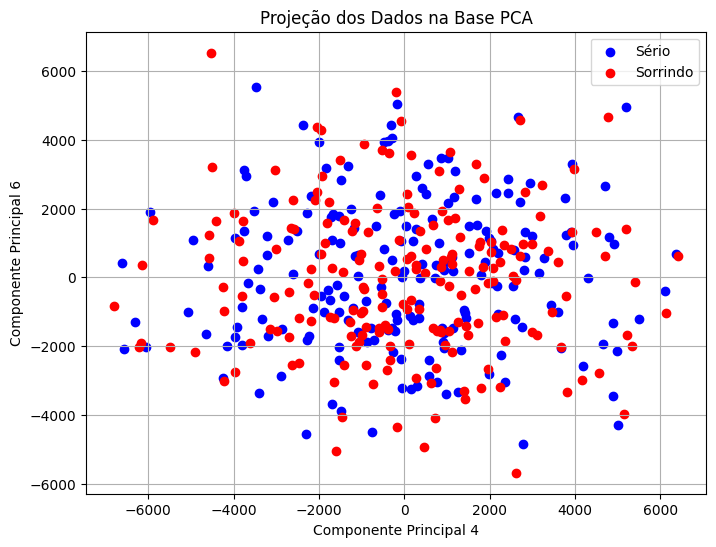

In [26]:
pca_small_size.plot_pca_projection(dim1=3, dim2=5)

Visualizando imagens após redução de dimensionalidade:

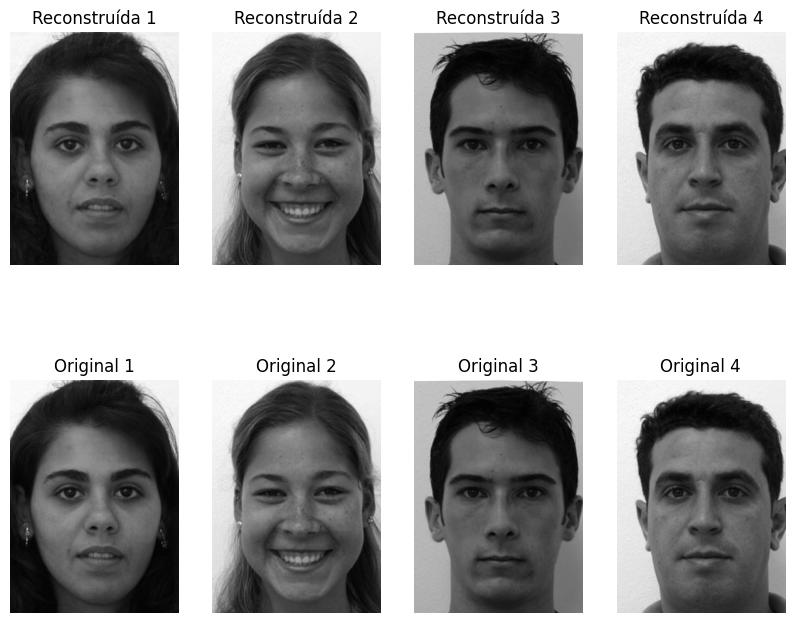

array([[191.22350411, 192.75431252, 193.41613619, ...,  10.63535959,
          7.45725648,   9.15760657],
       [200.76510255, 200.53649359, 199.68213962, ...,  17.44908579,
         16.09511064,  14.22416408],
       [194.15484447, 191.80978251, 190.02962037, ..., 123.18724759,
        122.6529581 , 124.84775115],
       ...,
       [175.04097325, 174.32752582, 172.1449641 , ...,  98.18362644,
        100.62732075, 102.4655572 ],
       [174.38093035, 173.56590538, 174.44805838, ..., 127.827497  ,
        133.11390995, 136.00948856],
       [213.41474761, 214.29082303, 214.36977498, ...,  21.78552199,
         16.59363875,  22.66359618]])

In [27]:
pca_small_size.reconstrucion_images()

c) fazendo gerador de imagens:

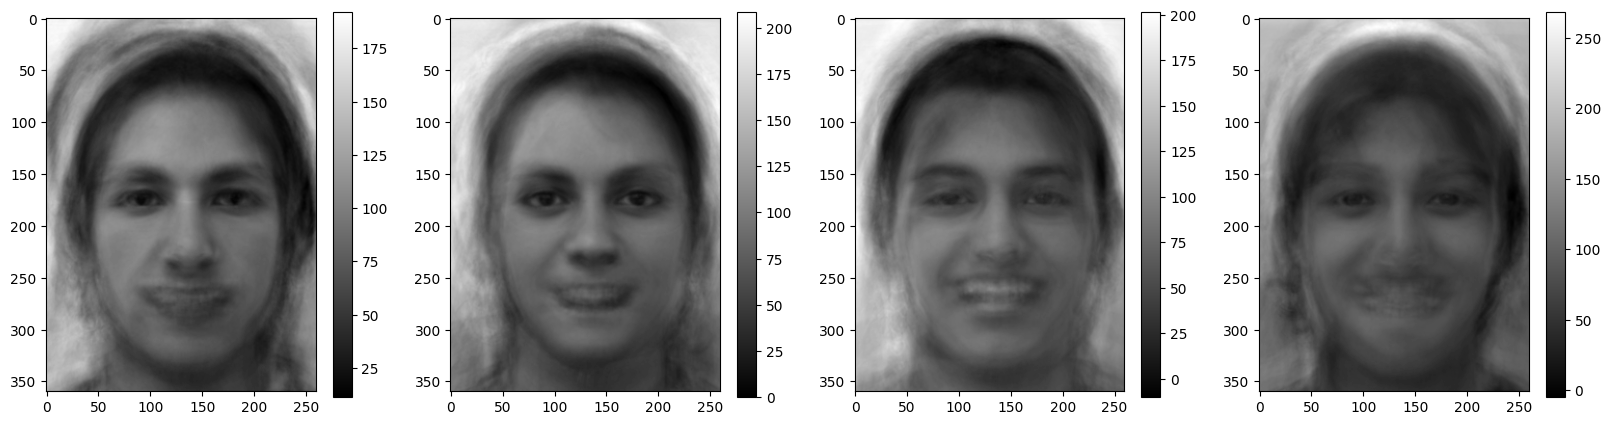

In [28]:
n_principal_components = 110
n_imagens = 4

pca_small_size.image_generator(n_principal_components, n_imagens)